Rafael Beltran Hernández

In [14]:
import numpy as np
import scipy as sy
from scipy.interpolate import interp1d as inter
from IPython.display import Image

# Problema de los 3 rodamientos en diferentes condiciones

Para solucionar este problema se tiene en cuenta el siguiente algoritmo, el cual se basa teniendo los valores de diseño $F_a, F_r, V$ e iterando con los valores de $C_0$ de la tabla 11-2. Ya teniendo un valor de $C_0$ se procede a encontrar el valor de $e$ con el cual (tabla 11-1), esto se lograra interpolando con _Scipy_ para tener una funcion que nos de los valores es esta tabla a forma de interpolacion de Lagrange. Con el valor de $e$ se pasa a encontrar el valor de la carga equivalente. Con este ultimo, se pasa a encontrar $C_{10}$ y si este valor de carga dinámica máxima es menor al valor del catálogo se tendrá en cuenta para una última revisión, en la que se encontrará el menor _bore_ de los rodamientos seleccionados

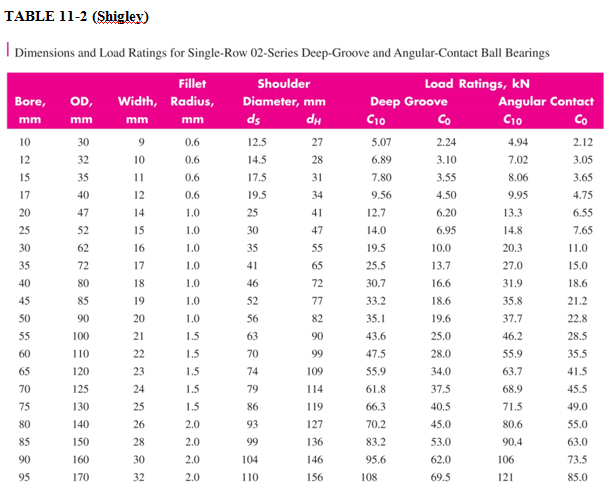

In [15]:
Image(filename='Imagenes Tareas/Tabla 11-2.png')

In [16]:
# Datos Tabla 11-2
C_0_lista = [2.24,3.1,3.55,4.5,6.2,6.95,10,13.7,16.6,18.6,19.6,25,28,34,37.5,40.5,45,53,62,69.5]
C_10_lista = [5.07,6.89,7.8,9.56,12.7,14,19.5,25.5,30.7,33.2,35.1,43.6,47.5,55.9,61.8,66.3,70.2,83.2,95.6,108]
# Datos Tabla 11-1
e_lista = [0.19, 0.21, 0.22, 0.24,0.26, 0.27, 0.28, 0.30, 0.34, 0.38, 0.42, 0.44]
razon_Fa_C_0 = [0.014, 0.021, 0.028, 0.042, 0.056, 0.070, 0.084, 0.110, 0.17, 0.28, 0.42, 0.56]
e_func = inter(razon_Fa_C_0,e_lista,fill_value="extrapolate") # Funcion del parámetro e en terminos de la razon F_a / C_0 PONER EN FLOAT!
y_2 = [2.3,2.15,1.99,1.85,1.71,1.63,1.55,1.45,1.31,1.15,1.04,1]
y_2_func= inter(razon_Fa_C_0,y_2,fill_value="extrapolate")

## Primer Problema

In [17]:
F_r, F_a = 8, 3 # kN
r1 = [F_a/i  for i in C_10_lista ] # Razones de F_a / C_0
e_1 = [float(e_func(j)) for j in r1  ]
V1 = 1.2 # Outer Ring
fa_vfr1 = F_a/(V1*F_r) # Razon F_a / vFr
print(fa_vfr1)

0.3125


In [18]:
# Calculo de los valores de carga equivalente
F_eq1 = list()
for i in range(len(e_1)):
    if e_1[i] >= fa_vfr1:
        F_eq1.append(V1*F_r)
    else:
        F_eq1.append(0.56*V1*F_r+ float(y_2_func(r1[i]))*F_a)

# Ya con las fuerzas equivalentes encuentro los C_10 teoricos
life1 = 1e8 # No hay correccion por confiabilidad
C10_1 = lambda f: f*(life1/1e+6)**(1/3) # Funcion que da el valor de la carga de diseño dada una carga equivalente
c_1 = [C10_1(u) for u in F_eq1] # Lista de los C10 teoricos
seleccionados1 = list()
for u in range(len(C_10_lista)):
    if C_10_lista[u] >= c_1[u]:
        seleccionados1.append((c_1[u],C_10_lista[u]))

In [19]:
seleccionados1

[(49.08936047049924, 55.9),
 (49.802806137648844, 61.8),
 (50.261602204759015, 66.3),
 (50.611646611517145, 70.2),
 (51.541452066968425, 83.2),
 (52.19270492572383, 95.6),
 (52.73419587887326, 108)]

En la anterior lista se ven los valores calculados de la carga maxima de diseño y en la derecha los valores de la carga de catálogo. Entonces se tiene que el rodamiento de la tabla 11-2 que corresponde a este valor mínimo es el que tiene la carga $C_{10} = 55.9 kN$. Es decir, un _bore_ de 65 mm

## Segundo Problema

In [20]:
F_r2 , F_a2 = 10, 5 #kN
r2 = [F_a2/i  for i in C_10_lista ] # Razones de F_a / C_0
e_2 = [float(e_func(j)) for j in r2  ]
V2 = 1 # Inner Ring
fa_vfr2 = F_a2/(V2*F_r2) # Razon F_a / vFr
print(fa_vfr2)

0.5


In [21]:
# Calculo de los valores de carga equivalente
F_eq2 = list()
for i in range(len(e_2)):
    if e_2[i] >= fa_vfr2:
        F_eq2.append(V2*F_r2)
    else:
        F_eq2.append(0.56*V2*F_r2+ float(y_2_func(r2[i]))*F_a2)

# Ya con las fuerzas equivalentes encuentro los C_10 teoricos
life2 = 12000*300*60 # hay correccion por confiabilidad
C10_2 = lambda f: f*(life2/(0.62*1e+6))**(1/3) # Funcion que da el valor de la carga de diseño dada una carga equivalente
c_2 = [C10_2(u) for u in F_eq2] # Lista de los C10 teoricos
seleccionados2 = list()
for u in range(len(C_10_lista)):
    if C_10_lista[u] >= c_2[u]:
        seleccionados2.append((c_2[u],C_10_lista[u]))

In [22]:
seleccionados2

[(102.97984709929338, 108)]

En un proceso similar al problema anterior, se tiene que de la lista anterior, el valor mínimo de carga de catálogo no excedida es de 108 kN, lo que se traduce en un _bore_ de 95mm

## Tercer Problema

In [23]:
F_r3 , F_a3 = 9, 3 #kN
r3 = [F_a3/i  for i in C_10_lista ] # Razones de F_a / C_0
e_3 = [float(e_func(j)) for j in r3  ]
V3 = 1.2 # Outer Ring
fa_vfr3 = F_a3/(V3*F_r3) # Razon F_a / vFr
print(fa_vfr3)

0.2777777777777778


In [24]:
# Calculo de los valores de carga equivalente
F_eq3 = list()
for i in range(len(e_3)):
    if e_3[i] >= fa_vfr3:
        F_eq3.append(V3*F_r3)
    else:
        F_eq3.append(0.56*V3*F_r3+ float(y_2_func(r3[i]))*F_a3)

# Ya con las fuerzas equivalentes encuentro los C_10 teoricos
life3 = 1e8 # hay correccion por confiabilidad
C10_3 = lambda f: f*(life3/(0.21*1e+6))**(1/3) # Funcion que da el valor de la carga de diseño dada una carga equivalente
c_3 = [C10_3(u) for u in F_eq3] # Lista de los C10 teoricos
seleccionados3 = list()
for u in range(len(C_10_lista)):
    if C_10_lista[u] >= c_3[u]:
        seleccionados3.append((c_3[u],C_10_lista[u]))

In [25]:
seleccionados3

[(93.05615561825975, 95.6), (93.96715505171917, 108)]

Finalmente, se tiene que la máxima carga no excedida es de 95.6 kN, lo que se traduce en un valor de _bore_ de 90 mm

# Problema del eje

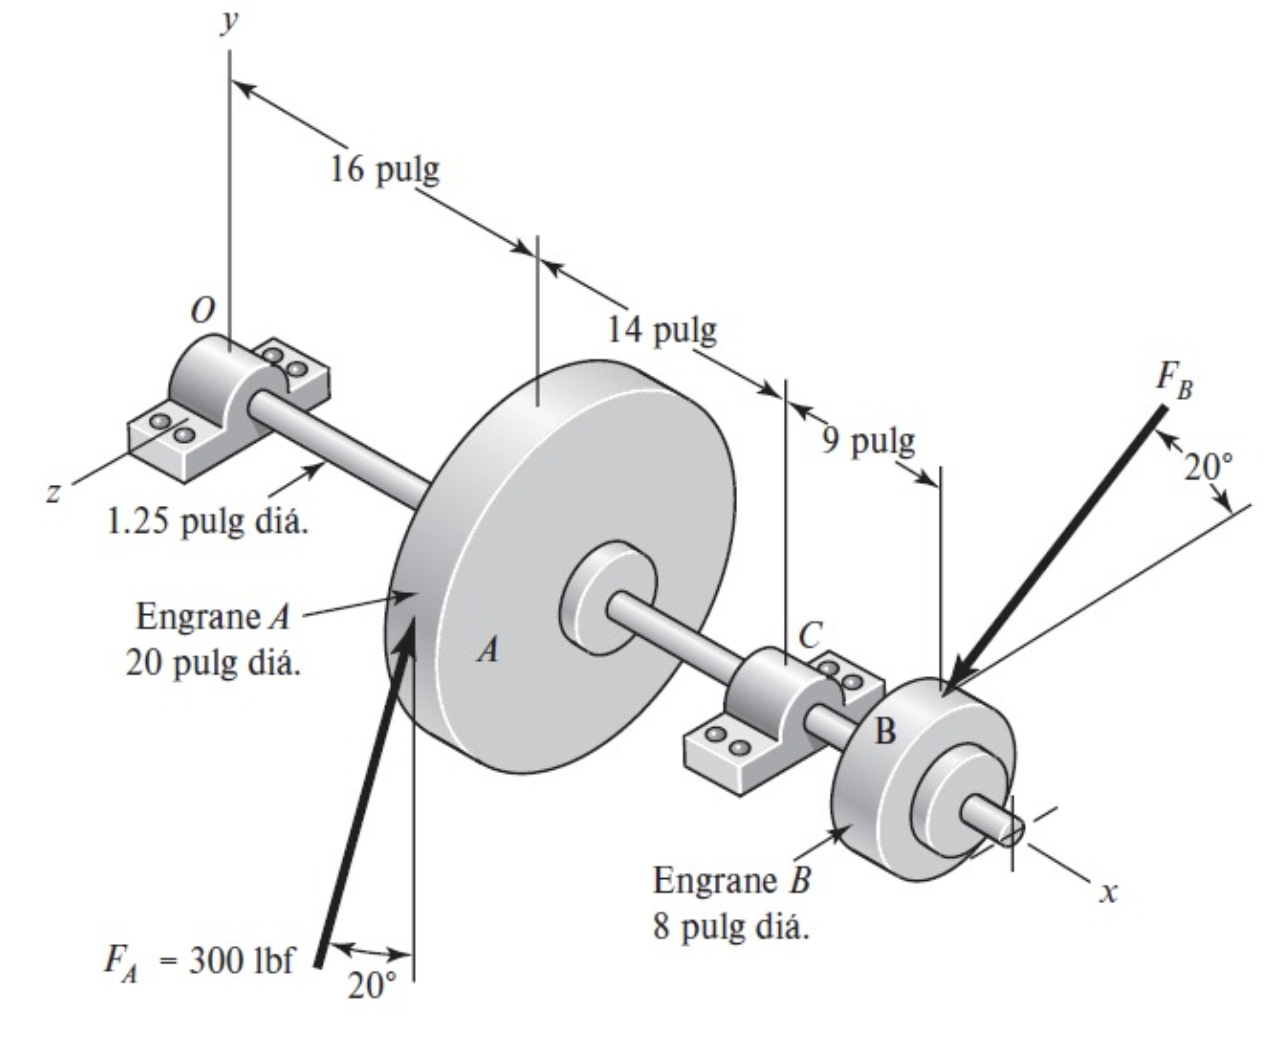

In [28]:
Image(filename='Imagenes Tareas/P2S14.png')

En este problema se encuentran las reacciones en los soportes $O$ y $C$. Después se encuentra la magnitud de las reacciones a causa de los componenetes $y$ y $z$. Esta magnitid hace que se tenga una fuerza radial y después se encuentra la fuerza de catálogo como:

\begin{equation}
    C_{10} = F_D \sqrt[3]{L_D/10^6}
\end{equation}

Las reacciones se encontraron con ayuda del sitio skyciv, tomando como fuerzas puntuales:

* $F_{A_z} = 300 \sin{20} = - 102.6 lbf$

* $F_{A_y} = 300 \cos{20} = 282 lbf$

* $| F_B |  = \frac{20 F_A}{8} = 750 lbf$

* $F_{B_z} = 740 \cos{20} = 704.78 lbf$

* $F_{B_y} = -740 \sin{20} = - 256.51 lbf$

Para el plano $x-z$ :

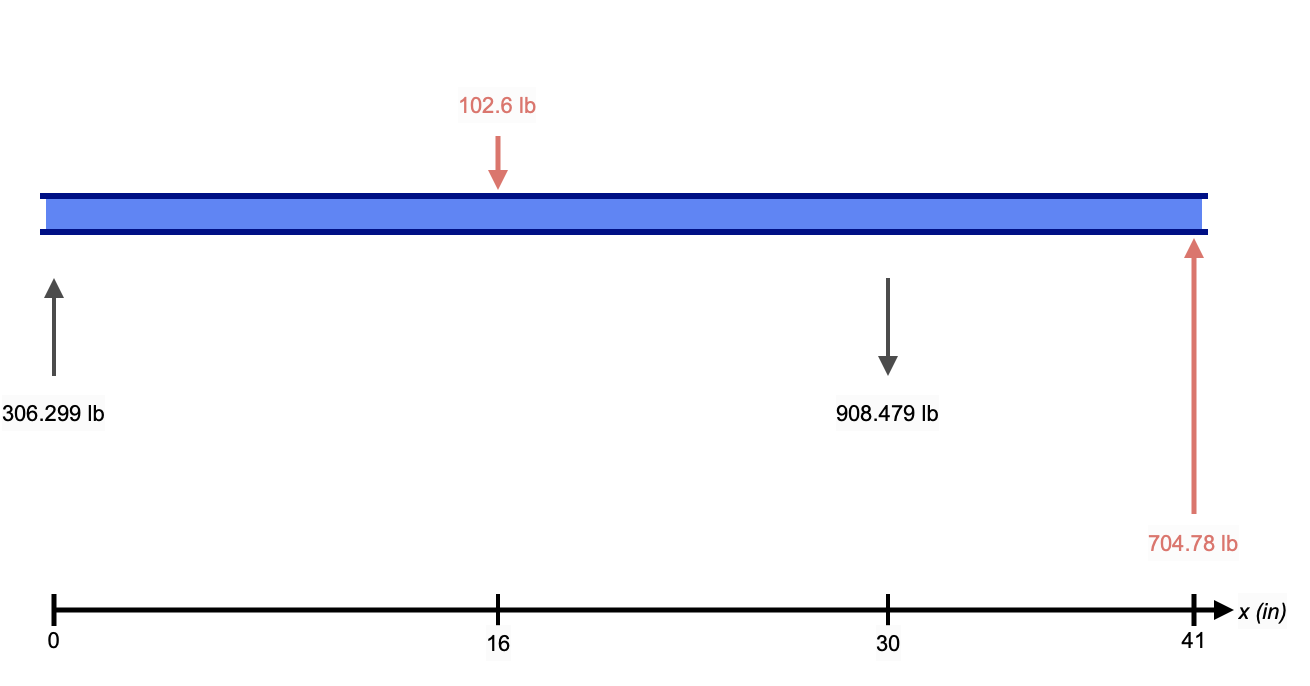

In [30]:
Image(filename='Imagenes Tareas/Plano X-Z S14.png')

Para el plano $x-y$:

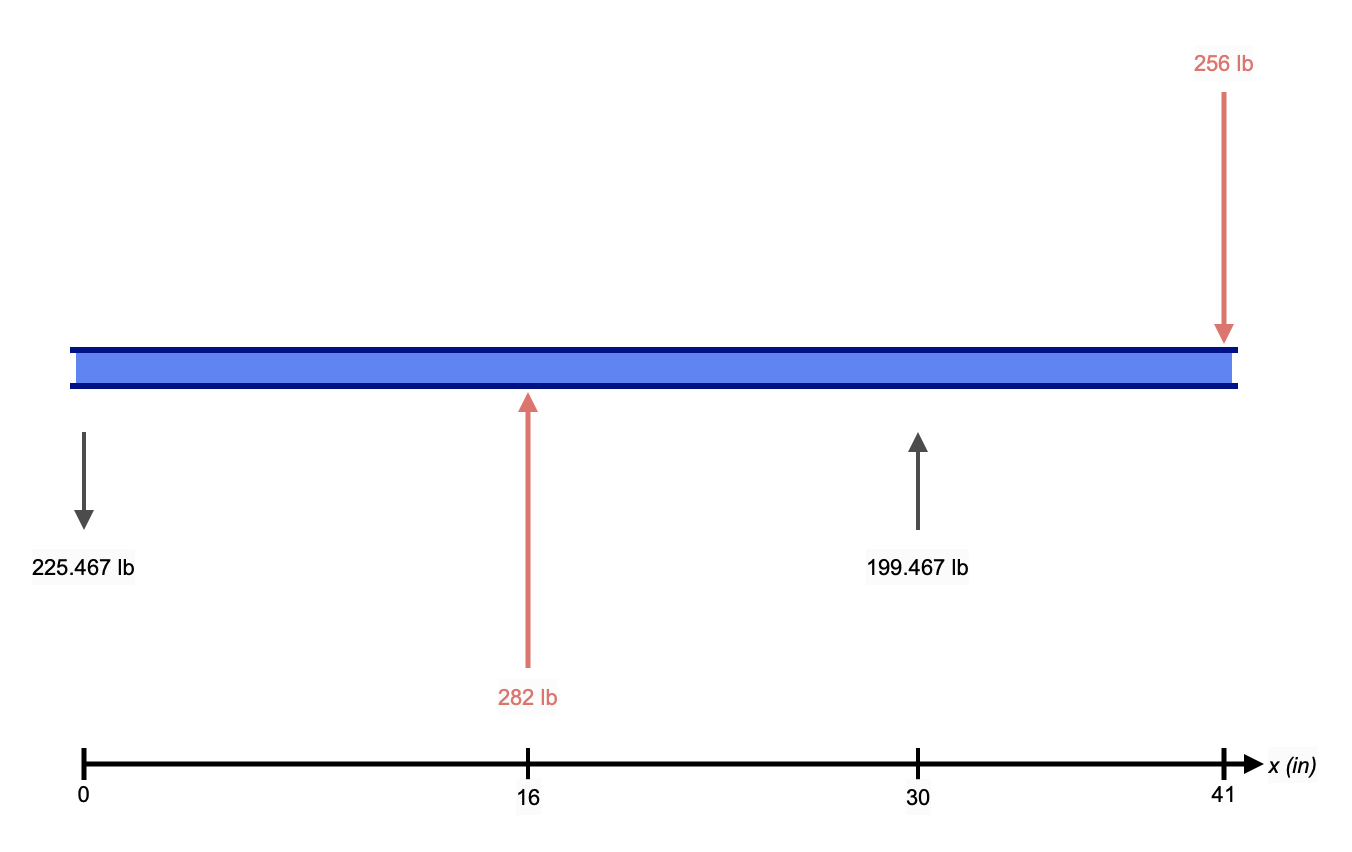

In [33]:
Image(filename='Imagenes Tareas/Plano X-Y S14.png')

Ahora con las reacciones se encuentra la magnitud en cada rodamiento, y se calcula el valor de la carga $C_{10}$

In [34]:
F_r_der = np.sqrt(199.467**2 + 908.479**2)
C_10 = 1.2 * F_r_der * (15000*1200*60/(0.62*1e6))**(1/3)
print('La fuerza C_10 es de',round(C_10,2),'lb')

La fuerza C_10 es de 13429.62 lb


Con esa fuerza límite y gracias al sitio de SKF, se seleccionó el Deep Groove RMS 14, disponible en: https://www.skf.com/group/products/rolling-bearings/ball-bearings/deep-groove-ball-bearings/productid-RMS%2014 Las dimensiones y los datos críticos de fuerza dinámica y estática se encuentran a continuación:


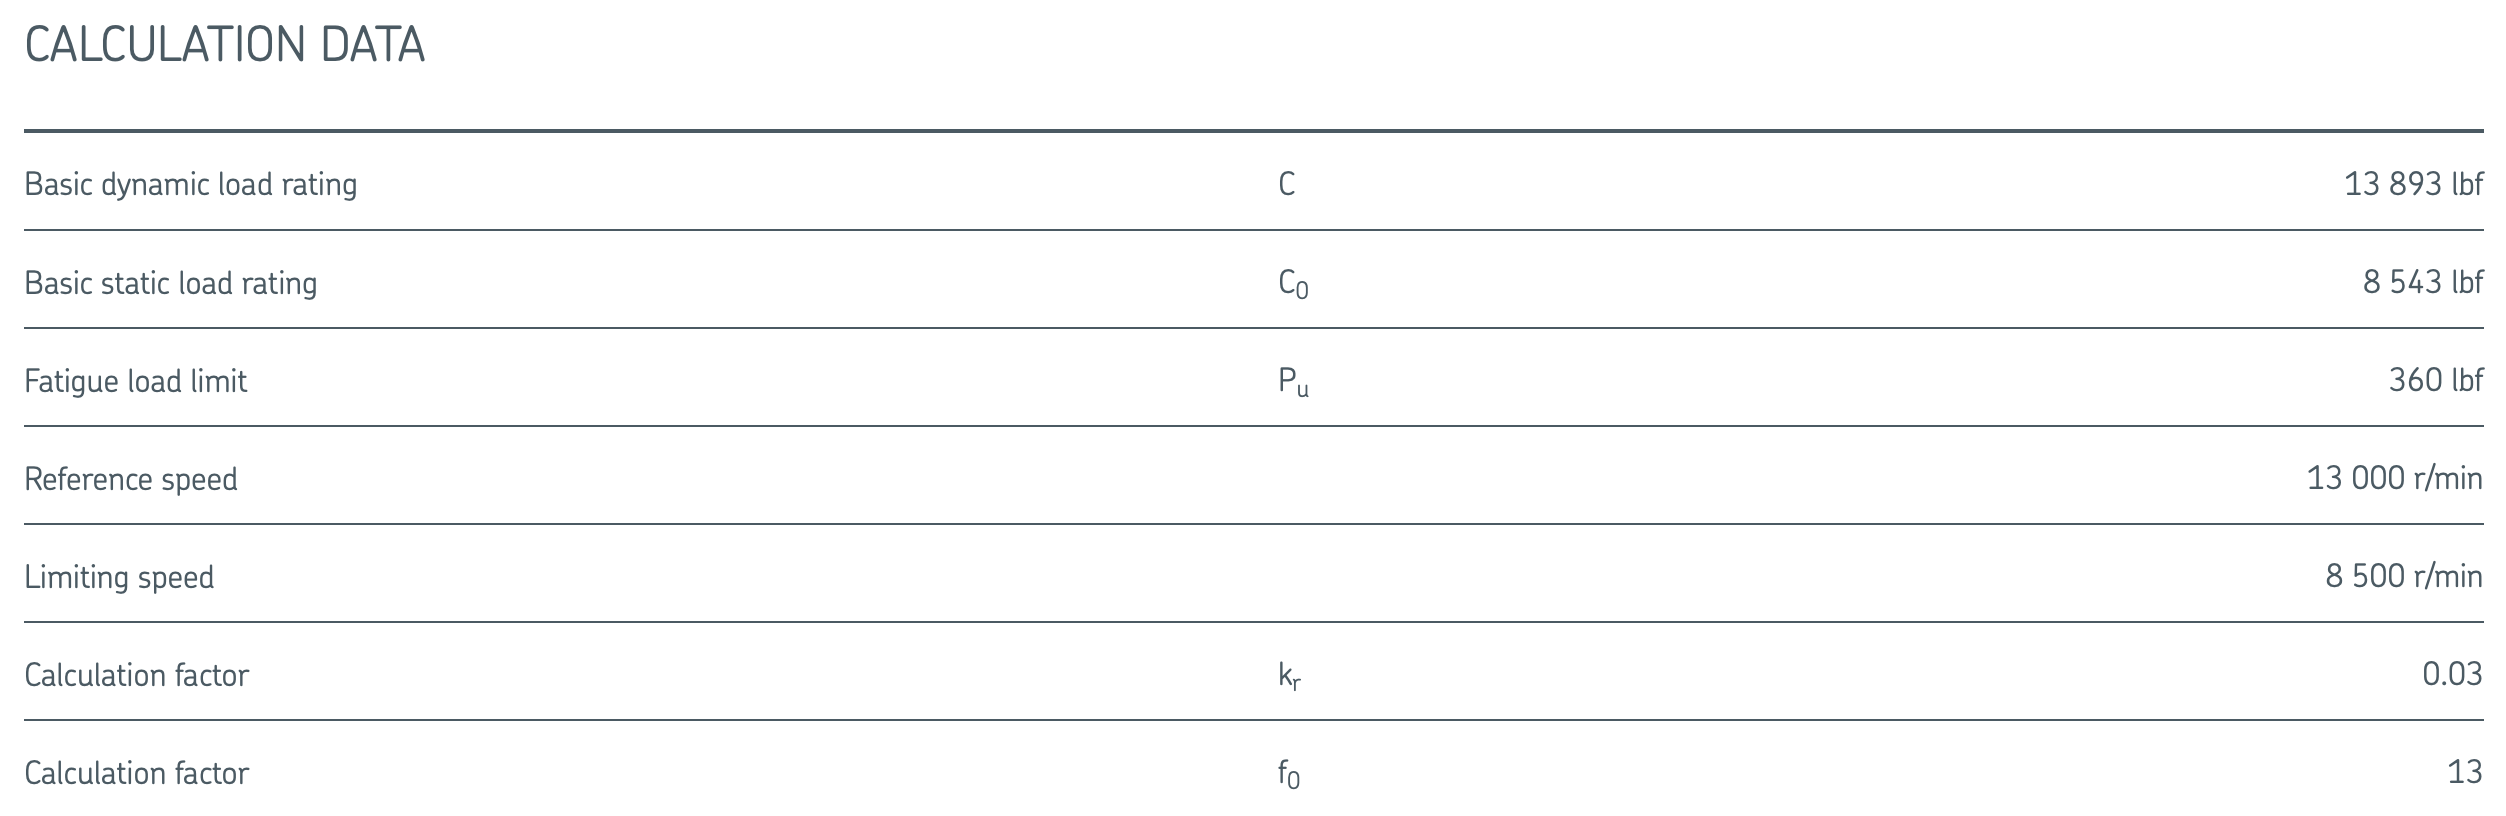

In [35]:
Image(filename='Imagenes Tareas/P2 S14a.png')

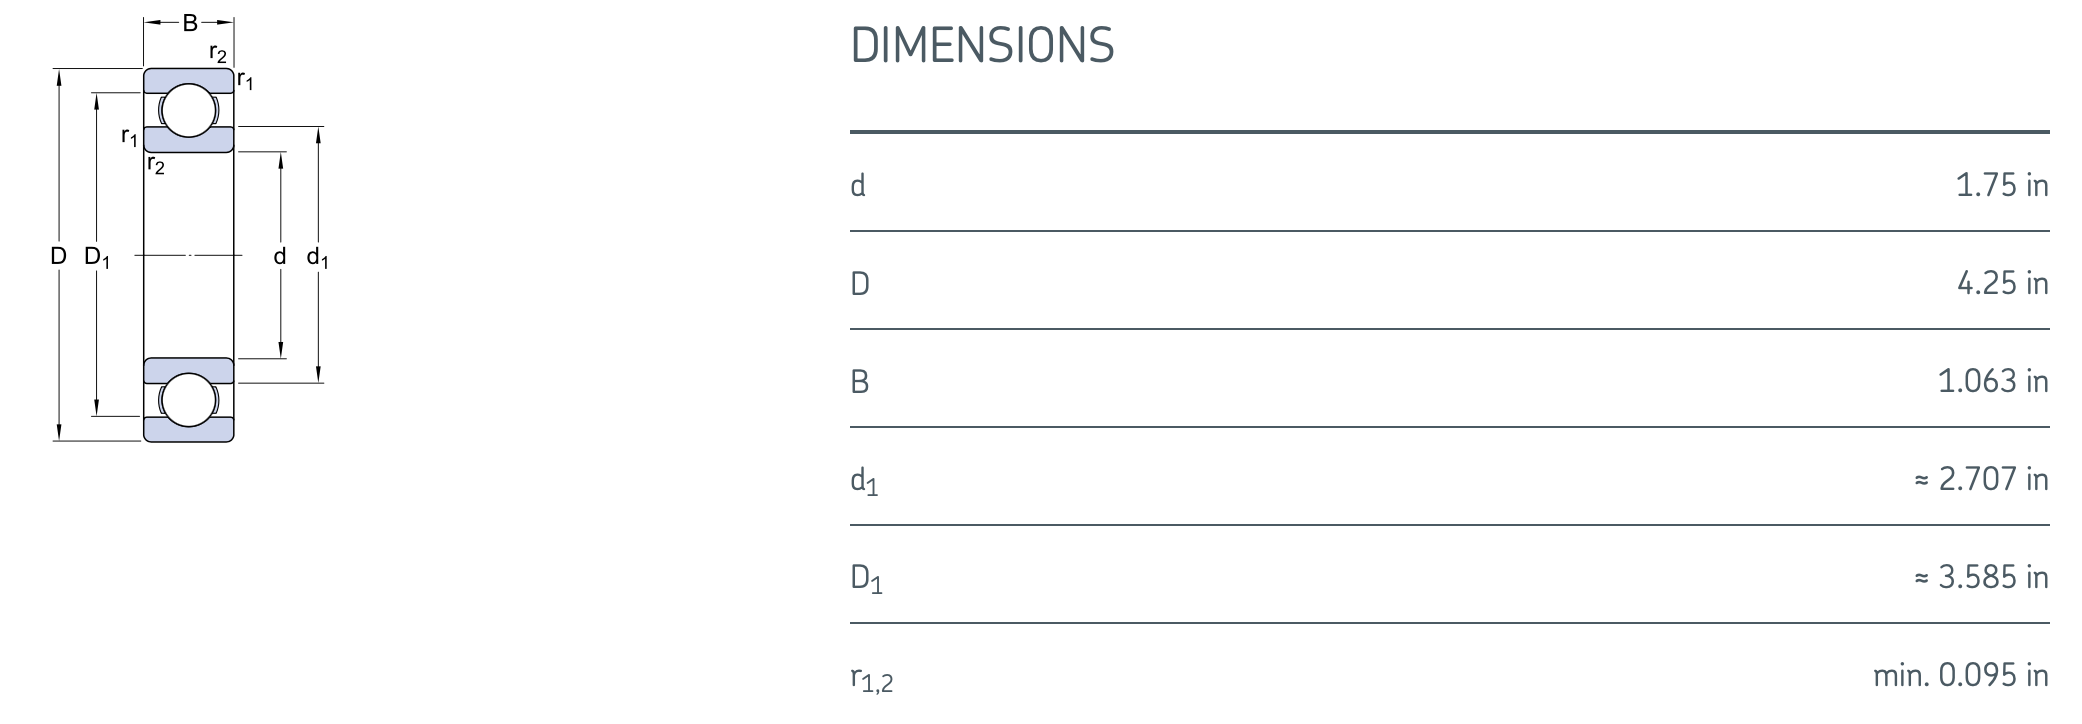

In [36]:
Image(filename='Imagenes Tareas/P2 S14b.png')